In [1]:
import pandas as pd
from tqdm import tqdm_notebook as tqdm
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

os.chdir('..')

from src.utils import *

In [2]:
# Loading the data
speeds_train_df = pd.read_csv(resources_path('dataset', 'preprocessed', 'speeds_train_imputed_time.csv.gz'), engine='c').dropna()
sensors_df = pd.read_csv(resources_path('dataset', 'originals', 'sensors.csv.gz'), engine='c')
events_df = pd.read_csv(resources_path('dataset', 'originals', 'events_train.csv.gz'), engine='c')
speeds_train_df.head(5)

,DATETIME_UTC,KEY,KM,SPEED_AVG,SPEED_SD,SPEED_MIN,SPEED_MAX,N_VEHICLES,IMPUTED
0,2018-09-01 00:00:00,0.0,333,231.125907,34.573767,169.890,440.096,150.0,False
1,2018-09-01 00:15:00,0.0,333,225.915947,41.437726,98.698,436.860,225.0,False
2,2018-09-01 00:30:00,0.0,333,228.498770,43.031004,114.878,440.096,148.0,False
3,2018-09-01 00:45:00,0.0,333,231.562904,40.921477,72.810,469.220,197.0,False
4,2018-09-01 01:00:00,0.0,333,229.282707,36.764729,61.484,360.814,147.0,False


In [3]:
sensors_df.head(5)

,KEY,EMERGENCY_LANE,KM,LANES,ROAD_TYPE
0,44.0,0,1410,2,0
1,146.0,0,1473,2,0
2,53.0,0,1421,2,0
3,122.0,0,679,2,0
4,17.0,1,1399,3,1


## Hourly prots

In [4]:
df = pd.merge(speeds_train_df.dropna(), sensors_df, left_on=[KEY, KM], right_on=[KEY, KM])
df[DATETIME] = pd.to_datetime(df.DATETIME_UTC)
df.head(5)

,DATETIME_UTC,KEY,KM,SPEED_AVG,SPEED_SD,SPEED_MIN,SPEED_MAX,N_VEHICLES,IMPUTED,EMERGENCY_LANE,LANES,ROAD_TYPE
0,2018-09-01 00:00:00,0.0,333,231.125907,34.573767,169.890,440.096,150.0,False,1,2,1
1,2018-09-01 00:15:00,0.0,333,225.915947,41.437726,98.698,436.860,225.0,False,1,2,1
2,2018-09-01 00:30:00,0.0,333,228.498770,43.031004,114.878,440.096,148.0,False,1,2,1
3,2018-09-01 00:45:00,0.0,333,231.562904,40.921477,72.810,469.220,197.0,False,1,2,1
4,2018-09-01 01:00:00,0.0,333,229.282707,36.764729,61.484,360.814,147.0,False,1,2,1


In [5]:
grouped_df = df.groupby([ROAD_TYPE, pd.Grouper(key=DATETIME, freq='3600s')])[[DATETIME, SPEED_AVG, N_CARS, 'IMPUTED']].mean()
grouped_df.head(10)

SPEED_AVG  N_VEHICLES   IMPUTED
ROAD_TYPE DATETIME_UTC                                         
0         2018-09-01 00:00:00  195.009980   65.765575  0.250378
          2018-09-01 01:00:00  192.975057   40.166978  0.130633
          2018-09-01 02:00:00  197.118891   29.808827  0.174836
          2018-09-01 03:00:00  199.187428   23.144815  0.188813
          2018-09-01 04:00:00  193.848959   23.084332  0.137816
          2018-09-01 05:00:00  185.963366   29.369520  0.073821
          2018-09-01 06:00:00  184.285979   39.356107  0.043496
          2018-09-01 07:00:00  183.009401   57.932184  0.027969
          2018-09-01 08:00:00  179.238217   77.322808  0.022194
          2018-09-01 09:00:00  175.617485  101.650556  0.026636

In [13]:
grouped_df['IMPUTED'] = grouped_df['IMPUTED'] >= 0.01
grouped_df = grouped_df.reset_index()
grouped_df.describe()

,index,ROAD_TYPE,SPEED_AVG,N_VEHICLES
count,6552.000000,6552.000000,6552.000000,6552.000000
mean,3275.500000,1.000000,200.539240,157.065749
std,1891.543814,0.816559,16.398713,134.120810
min,0.000000,0.000000,159.702605,6.142476
25%,1637.750000,0.000000,183.732949,51.095726
50%,3275.500000,1.000000,204.748476,99.166442
75%,4913.250000,2.000000,213.708268,222.496727
max,6551.000000,2.000000,233.761899,522.669131


/Users/gianpaolo/anaconda3/envs/dmtm/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


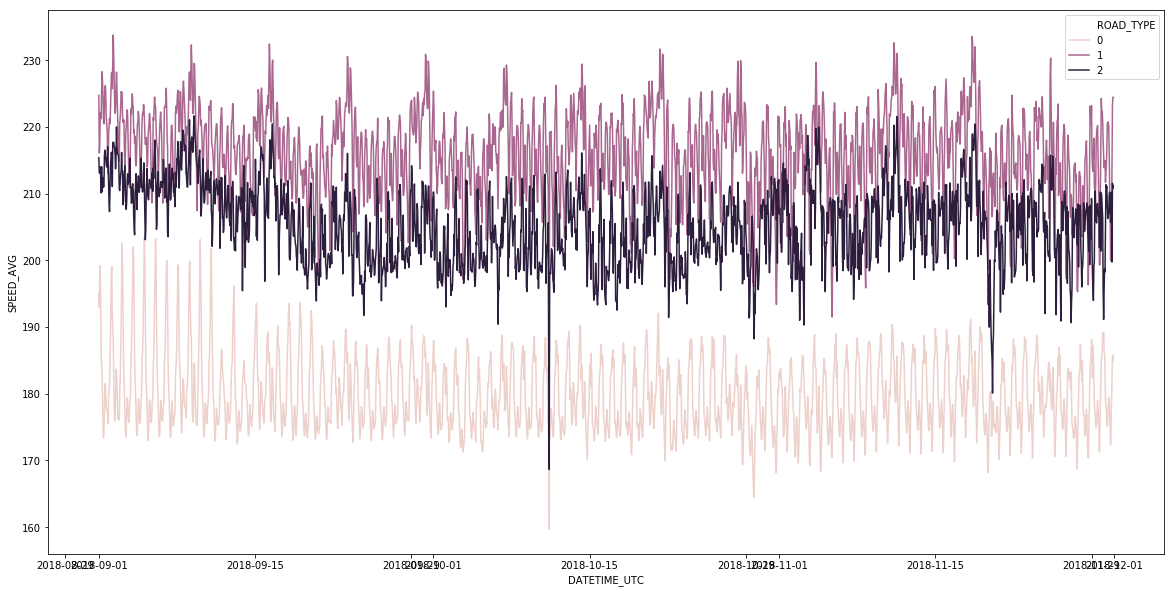

In [7]:
plt.figure(figsize=(20, 10))
sns.lineplot(x=grouped_df.DATETIME_UTC, y=grouped_df.SPEED_AVG, hue=grouped_df.ROAD_TYPE);

## Daily plots

In [36]:
daily_df = df.groupby([ROAD_TYPE, pd.Grouper(key=DATETIME, freq='1D')])[[DATETIME, SPEED_AVG, N_CARS, 'IMPUTED']].mean()
daily_df.head(10)

SPEED_AVG  N_VEHICLES   IMPUTED
ROAD_TYPE DATETIME_UTC                                  
0         2018-09-01    182.150840   77.389659  0.064394
          2018-09-02    183.160881   73.303464  0.059034
          2018-09-03    182.366176   77.597382  0.061394
          2018-09-04    182.273882   77.174884  0.066397
          2018-09-05    182.069020   78.406911  0.064446
          2018-09-06    182.141812   79.936342  0.065496
          2018-09-07    181.350572   82.551165  0.061400
          2018-09-08    182.411931   75.196355  0.058167
          2018-09-09    183.287355   73.456453  0.059235
          2018-09-10    182.035796   69.990284  0.065157

In [37]:
daily_df['IMPUTED'] = daily_df['IMPUTED'] >= 0.01
daily_df = daily_df.reset_index()
daily_df.describe()

,ROAD_TYPE,SPEED_AVG,N_VEHICLES
count,273.000000,273.000000,273.000000
mean,1.000000,200.381951,163.729046
std,0.817996,15.859675,92.344185
min,0.000000,174.006482,45.082148
25%,0.000000,180.301541,65.724242
50%,1.000000,205.328279,144.498413
75%,2.000000,213.867787,276.787301
max,2.000000,224.250178,313.246550


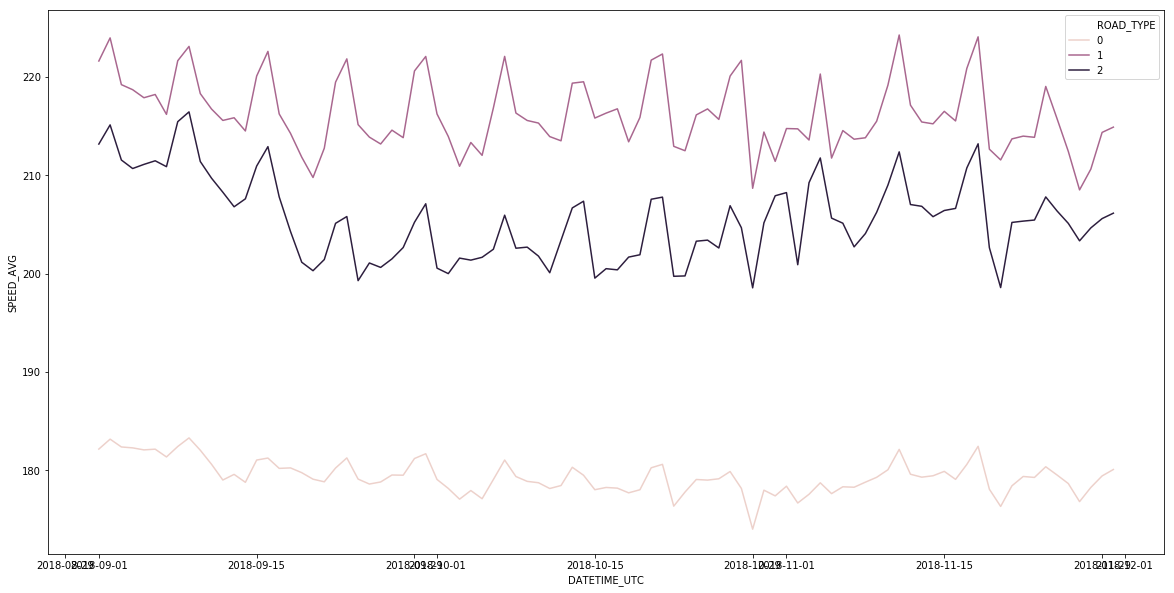

In [39]:
plt.figure(figsize=(20, 10))
sns.lineplot(x=daily_df.DATETIME_UTC, y=daily_df.SPEED_AVG, hue=daily_df.ROAD_TYPE);